# Big Data y Machine Learning (UBA) -  2025

## Trabajo Práctico 1: Jugando con APIs y WebScraping 

### Reglas de formato y presentación
- El trabajo debe estar debidamente documentado comentado (utilizando #) para que tanto los docentes como sus compañeros puedan comprender el código fácilmente.

- El mismo debe ser completado en este Jupyter Notebook y entregado como tal, es decir en un archivo .ipynb


### Fecha de entrega:
Viernes 4 de Abril a las 13:00 hs

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub llamado “Entrega final del tp”. 
- Asegurense de haber creado una carpeta llamada TP1. Este Jupyter Notebook y el correspondiente al TP1 deben estar dentro de esa carpeta.
- También deben enviar el link de su repositorio -para que pueda ser clonado y corregido- a mi correo 25RO35480961@campus.economicas.uba.ar. Usar de asunto de email <i>"Big Data - TP 1 - Grupo #"</i> y nombrar el archivo <i>"TP1_Grupo #"</i> donde # es el número de grupo que le fue asignado.
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que: 
    - No envien el correo hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. 
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija.
- En resumen, la carpeta del repositorio debe incluir:
    - El codigo
    - Un documento Word (Parte A) donde esten las figuras y una breve descripción de las mismas.
    - El excel con los links webscrappeados (Parte B)

### Parte A

#### Ejercicio 1 - Jugando con APIs
Usando la API del Banco Mundial [link](https://wbdata.readthedocs.io/en/stable/) , obtener dos series de indicadores para dos paises a elección en una consulta de búsqueda. Pueden buscar serie de indicadores de su interés.

In [207]:
# Resolver acá
#Primero importamos wbdata para tener acceso a la informacion que necesitamos
import wbdata
#Pese a que no se vea en esta linea de codigo, usamos In [1]: wbdata.get_sources() para conseguir los datos que queremos, en este caso el acceso a la electricidad de cada pais.
#Luego obtenemos el codigo para hallar lo que queremos y lo reemplazamos en data = wbdata.get_data("") y definimos los paises y las fechas que buscamos.
data = wbdata.get_data("EG.ELC.ACCS.ZS", country=["USA", "ARG"], date=("2018", "2019"))
#Usamos df o DataFrame para hallar todos los datos que requerimos parte por parte.
df = pd.DataFrame(data)
df = df[df['date'].isin(['2018', '2019'])]
#Con el siguiente df seleccionamos las columnas.
df = df[['country', 'date', 'value']] 
#Extraemos los nombres de los paises
df['country'] = df['country'].apply(lambda x: x['value'])
#Renombramos la columna para que quede mas bonito.
df = df.rename(columns={'value': 'Porcentaje de acceso a electricidad'})  

#Imprimimos el df para que nos arroje los datos que buscamos.
print(df)


         country  date  Porcentaje de acceso a electricidad
0      Argentina  2019                                  100
1      Argentina  2018                                  100
2  United States  2019                                  100
3  United States  2018                                  100


#### Ejercicio 2 - Repaso de Pandas
Realicen una estadistica descriptiva de ambas series de indicadores comparando los dos países.

In [210]:
# Resolver acá
#Ahora esto es mas sencillo, con la base ya lista podemos buscar las estadisticas para compararlo con la siguiente linea de codigo.
estadisticas = df.groupby('country')['Porcentaje de acceso a electricidad'].describe()

# Imprimimos las estadísticas descriptivas.
print("\nEstadísticas descriptivas del acceso a electricidad:")
print(estadisticas)



Estadísticas descriptivas del acceso a electricidad:
               count   mean  std    min    25%    50%    75%    max
country                                                            
Argentina        2.0  100.0  0.0  100.0  100.0  100.0  100.0  100.0
United States    2.0  100.0  0.0  100.0  100.0  100.0  100.0  100.0


#### Ejercicio 3 - Practicando con Matplotlib
Armen dos gráficos distintos usando la librería Matplotlib (repasen Clase 4). Uno programandolo con el estilo *pyplot* y otro gráfico de estilo *orientada a objetos*

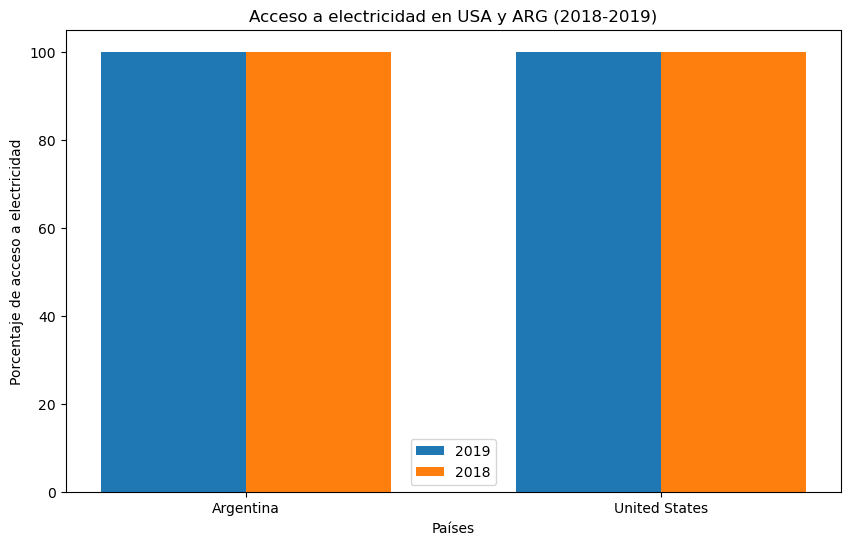

In [215]:
# Resolver acá estilo Matplotlib
import matplotlib.pyplot as plt
import wbdata
import pandas as pd
import numpy as np

# Obtener datos
data = wbdata.get_data("EG.ELC.ACCS.ZS", country=["USA", "ARG"], date=("2018", "2019"))
df = pd.DataFrame(data)
df = df[df['date'].isin(['2018', '2019'])]
df['country'] = df['country'].apply(lambda x: x['value'])

# Renombrar la columna 'value' a 'Porcentaje de acceso a electricidad'
df = df.rename(columns={'value': 'Porcentaje de acceso a electricidad'})

# Preparar datos para el gráfico
paises = df['country'].unique()
anios = df['date'].unique()
valores = df['Porcentaje de acceso a electricidad'].values.reshape(len(paises), len(anios))

# Crear gráfico de barras agrupadas
plt.figure(figsize=(10, 6))
bar_width = 0.35
x = np.arange(len(paises))

plt.bar(x - bar_width/2, valores[:, 0], bar_width, label=anios[0])
plt.bar(x + bar_width/2, valores[:, 1], bar_width, label=anios[1])

plt.xlabel('Países')
plt.ylabel('Porcentaje de acceso a electricidad')
plt.title('Acceso a electricidad en USA y ARG (2018-2019)')
plt.xticks(x, paises)
plt.legend()
plt.show()


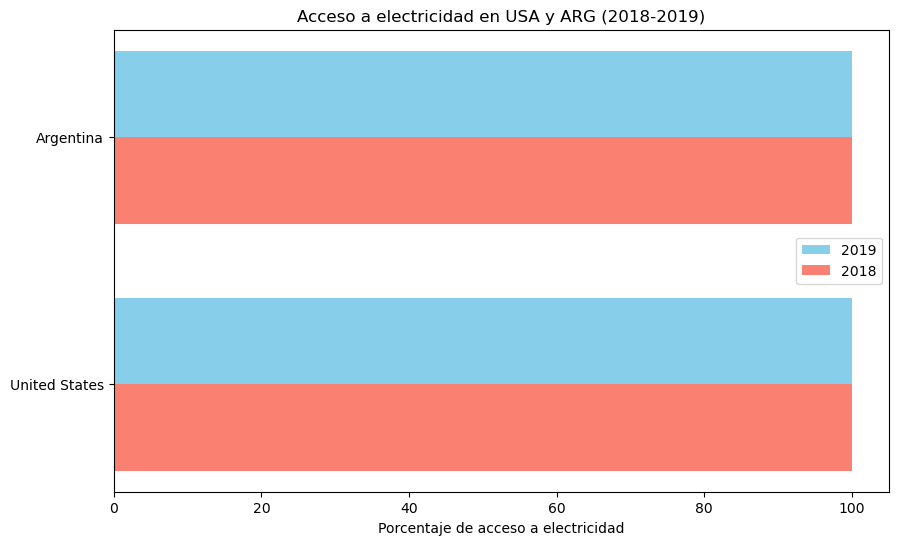

In [227]:
# Resolver acá estilo orientado-objetos 
# Tip: aprovechar este estilo de programar una figura para hacerlo más lindo 
import matplotlib.pyplot as plt
import wbdata
import pandas as pd
import numpy as np

# Obtener datos
data = wbdata.get_data("EG.ELC.ACCS.ZS", country=["USA", "ARG"], date=("2018", "2019"))
df = pd.DataFrame(data)
df = df[df['date'].isin(['2018', '2019'])]
df['country'] = df['country'].apply(lambda x: x['value'])

# Renombrar la columna 'value' a 'Porcentaje de acceso a electricidad'
df = df.rename(columns={'value': 'Porcentaje de acceso a electricidad'})

# Preparar datos para el gráfico de barras horizontales agrupadas
paises = df['country'].unique()
anios = df['date'].unique()
valores = df['Porcentaje de acceso a electricidad'].values.reshape(len(paises), len(anios))

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Crear gráfico de barras horizontales agrupadas
bar_width = 0.35
y = np.arange(len(paises))

ax.barh(y - bar_width/2, valores[:, 0], bar_width, label=anios[0], color='skyblue')
ax.barh(y + bar_width/2, valores[:, 1], bar_width, label=anios[1], color='salmon')

# Personalizar gráfico
ax.set_yticks(y)
ax.set_yticklabels(paises)
ax.set_xlabel('Porcentaje de acceso a electricidad')
ax.set_title('Acceso a electricidad en USA y ARG (2018-2019)')
ax.legend()

# Ajustar la posición de las barras para evitar superposición
ax.invert_yaxis()  # Invertir el eje y para que los países estén en orden ascendente

# Mostrar gráfico
plt.show()

### Parte B

#### Ejercicio 4
De la página de noticias del [diario La Nación](https://www.lanacion.com.ar/) o cualquier diario que les interese, utilicen herramientas de web scraping para obtener los **links** de las noticias de la portada. Guarden los links obtenidos en un dataframe y expórtenlo a un archivo de excel.

Nota 1: es posible que logren obtener los links a las noticias sin el dominio: "https://www.lanacion.com.ar/". De ser así, concatenen el dominio a la ruta del link obtenido, tal que se obtenga un link al que se pueda acceder. Es decir, que las cadenas de caracteres finales tendrán la forma: https://www.lanacion.com.ar/*texto_obtenido*)

Nota 2: junto con su entrega, adjunten una captura de la página de noticias al momento de correr su código. Eso servirá al momento de la corrección para verificar que los links obtenidos hacen referencia a las noticias de ese día y hora.

In [ ]:
# Resolver acá
